### Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from regressors import stats

### Dataset Analysis

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


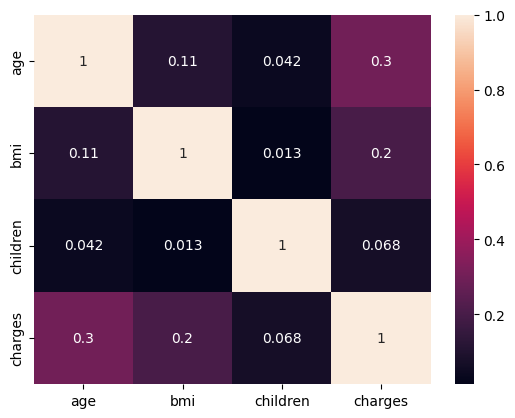

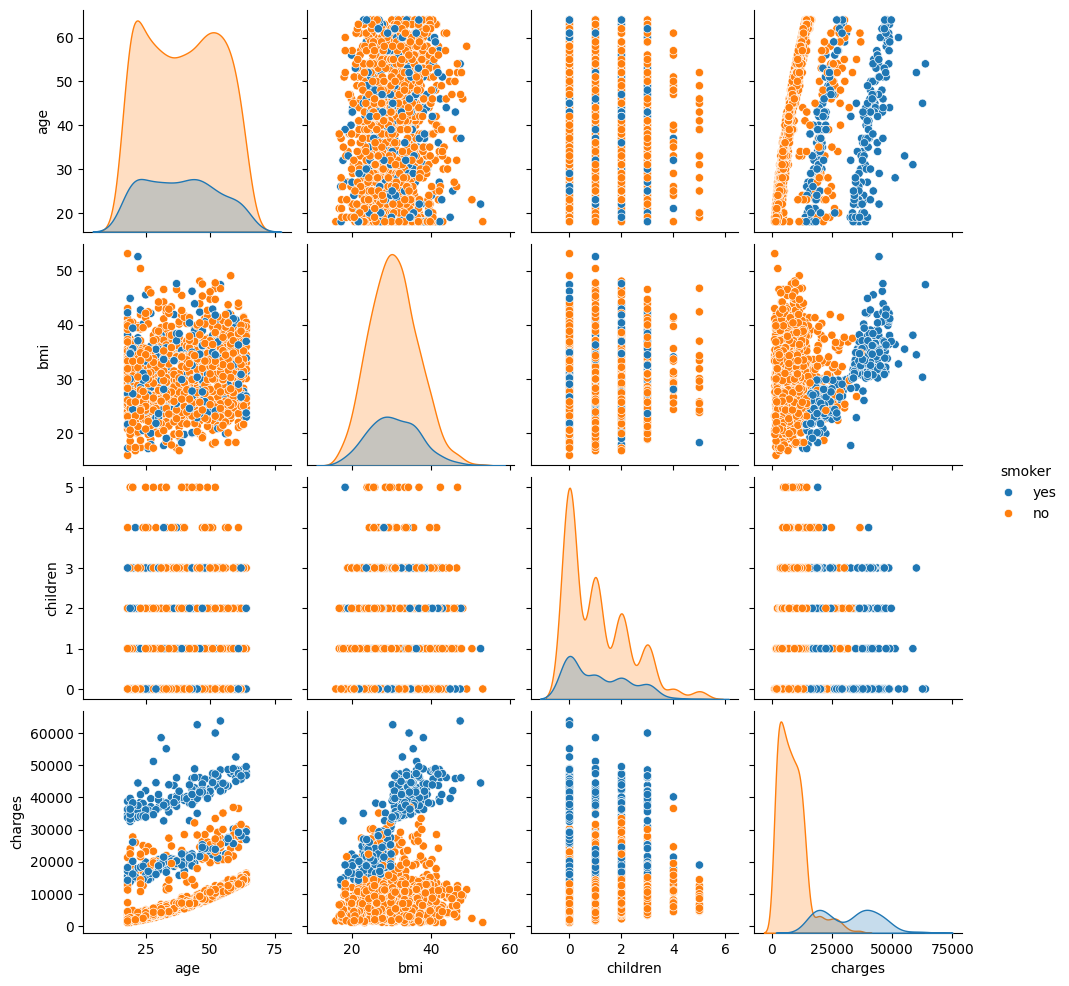

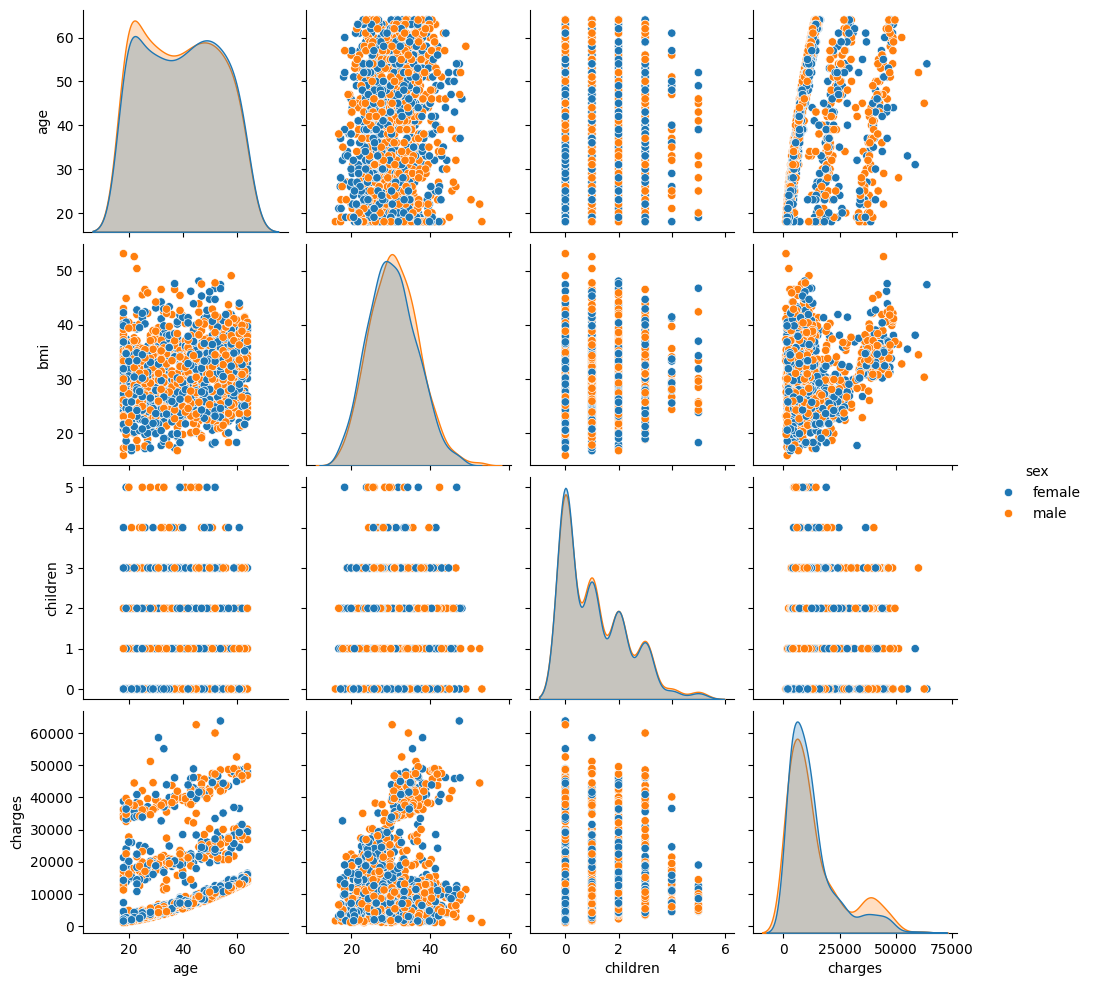

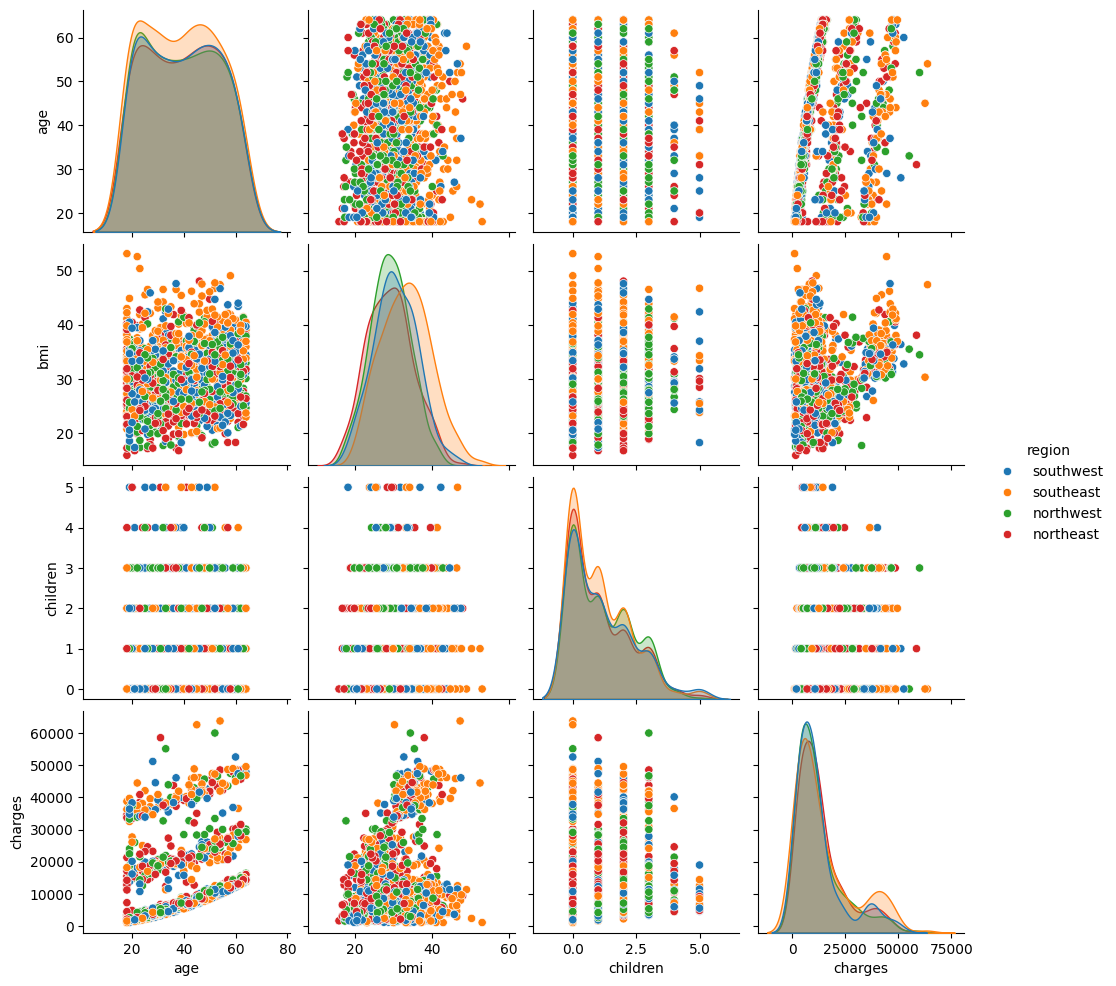

In [57]:
# Load the dataset
df = pd.read_csv("/home/alejandro/proyectos/platzi/ia/machine_learning/Regresiones/regre_l_v2/multivariable/insurance.csv")

# Display the first 5 rows of the dataset
print(df.head())
print()

# Basic statistics
print(df.describe())

# Plots
numerical_df = df.drop(["sex","smoker","region"], axis=1)
sns.heatmap(data=numerical_df.corr(), annot=True)
sns.pairplot(data=df, hue="smoker")
plt.show()
sns.pairplot(data=df, hue="sex")
plt.show()
sns.pairplot(data=df, hue="region")
plt.show()

### Preprocessing

In [58]:
encode_df = pd.get_dummies(df, columns=["smoker"], drop_first=True, dtype=int)
print(encode_df.head())
x = encode_df.drop(["charges", "sex", "region","children"], axis=1).values
y = (encode_df["charges"].values).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_std = StandardScaler().fit(x)
y_std = StandardScaler().fit(y)

x_train = x_std.transform(x_train)
x_test = x_std.transform(x_test)
y_train = y_std.transform(y_train)
y_test = y_std.transform(y_test)

   age     sex     bmi  children     region      charges  smoker_yes
0   19  female  27.900         0  southwest  16884.92400           1
1   18    male  33.770         1  southeast   1725.55230           0
2   28    male  33.000         3  southeast   4449.46200           0
3   33    male  22.705         0  northwest  21984.47061           0
4   32    male  28.880         0  northwest   3866.85520           0


### Model Training

In [59]:
model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

### Metrics


mean square error: 0.22289128510677533
r2 score: 0.7947394376884894

===================Sumary===================

Residuals:
    Min      1Q  Median     3Q    Max
-1.8945 -0.1164  0.0735 0.2055 0.9353


Coefficients:
            Estimate  Std. Error  t value  p value
_intercept  0.000000    0.028875   0.0000      1.0
age         0.298262    0.029326  10.1707      0.0
bmi         0.162013    0.030930   5.2380      0.0
smoker_yes  0.787563    0.028990  27.1668      0.0
---
R-squared:  0.79474,    Adjusted R-squared:  0.79241
F-statistic: 340.72 on 3 features
None


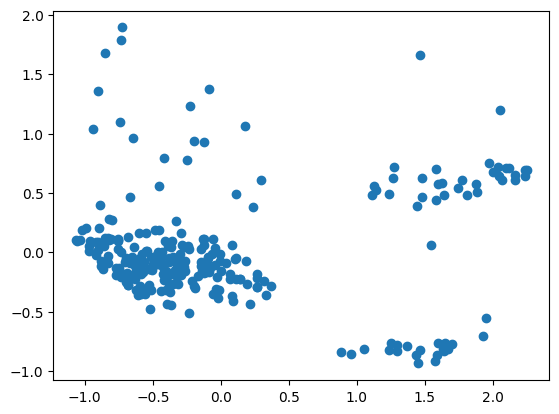

In [60]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print()
print(f"mean square error: {mse}")
print(f"r2 score: {r2}")
print()

print("===================Sumary===================")
x_col = encode_df.drop(["charges","region","children","sex"], axis=1).columns
# model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)
print()
print(stats.summary(model, x_test, y_test, x_col))

residual = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred, residual)
plt.show()